# How does the Adam Optimizer work?

Adam stands for Adaptive Moment Estimation, which is usually used when working with a lot of data. What it does is combine momentum and root mean square propagation. Momentum is an algorithm that accelerates the gradient descent algorithm by using the weighted average of the gradients. Gradients are a measure of the change in weights with the data. Root mean square propagation is a learning algorithm that works by taking the 'exponential moving average'. 

In [64]:
import pandas as pd
import torch
from sklearn.metrics import ConfusionMatrixDisplay


diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
def scores(tn, fn, fp, tp):
    accuracy = (tp+tn)/(tp+fp+tn+fn)
    precision = (tp)/(tp+fp)
    recall = (tp)/(tp+fn)
    return f'accuracy: {accuracy}\nprecision: {precision}\nrecall: {recall}'
         
        

In [66]:
from sklearn.model_selection import train_test_split

X = diabetes_df.drop('Outcome', axis=1).values
y = diabetes_df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=13,
                                                    stratify=y)

In [67]:
import torch.nn as nn
import torch.nn.functional as F

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_test = torch.LongTensor(y_test)
y_train = torch.LongTensor(y_train)

In [68]:
class ANN_Model(nn.Module):
    def __init__(self, input_features=8,
                 hidden1=20,hidden2=20,
                 out_features=2):
        super().__init__()
        
        self.layer_1_connection = nn.Linear(input_features, hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
        
    def forward(self, x):
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

In [69]:
torch.manual_seed(42)

ann = ANN_Model()

# Performed with Adam

In [70]:
loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(ann.parameters(), lr = 0.01)

In [71]:
final_loss = []
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = ann.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)

    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss {loss}')

    optimizer.zero_grad() 
    loss.backward()
    optimizer.step()

Epoch number: 1 with loss 0.7291591763496399
Epoch number: 11 with loss 0.6594549417495728
Epoch number: 21 with loss 0.6230573654174805
Epoch number: 31 with loss 0.5999691486358643
Epoch number: 41 with loss 0.5753000378608704
Epoch number: 51 with loss 0.5545726418495178
Epoch number: 61 with loss 0.5375445485115051
Epoch number: 71 with loss 0.5166199803352356
Epoch number: 81 with loss 0.4995483160018921
Epoch number: 91 with loss 0.4867841899394989
Epoch number: 101 with loss 0.47774767875671387
Epoch number: 111 with loss 0.46646854281425476
Epoch number: 121 with loss 0.46448931097984314
Epoch number: 131 with loss 0.4527691602706909
Epoch number: 141 with loss 0.4491287171840668
Epoch number: 151 with loss 0.449674129486084
Epoch number: 161 with loss 0.44332605600357056
Epoch number: 171 with loss 0.4308636784553528
Epoch number: 181 with loss 0.4358670115470886
Epoch number: 191 with loss 0.43415993452072144
Epoch number: 201 with loss 0.4244072437286377
Epoch number: 211 wi

In [72]:
y_pred = []

with torch.no_grad():
    for i, data in enumerate(X_test):
        prediction = ann(data)
        y_pred.append(prediction.argmax())

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (233).

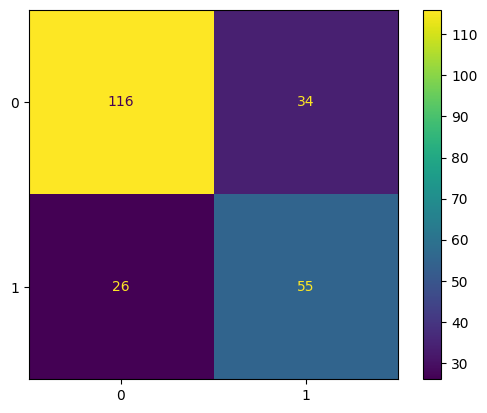

In [73]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# Performed with RMSprop

In [ ]:
import torch.optim.rmsprop

optimizer = torch.optim.RMSprop(ann.parameters(), lr = 0.01)

In [ ]:
final_loss = []
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = ann.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)
    
    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss {loss}')
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

Epoch number: 1 with loss 0.3467452824115753
Epoch number: 11 with loss 86.1385726928711
Epoch number: 21 with loss 4.192177772521973
Epoch number: 31 with loss 4.666873931884766
Epoch number: 41 with loss 3.1711065769195557
Epoch number: 51 with loss 0.971932590007782
Epoch number: 61 with loss 1.2740918397903442
Epoch number: 71 with loss 0.9672430753707886
Epoch number: 81 with loss 0.9332301616668701
Epoch number: 91 with loss 0.9018722772598267
Epoch number: 101 with loss 0.8733576536178589
Epoch number: 111 with loss 0.8419263362884521
Epoch number: 121 with loss 0.6776592135429382
Epoch number: 131 with loss 0.8384072780609131
Epoch number: 141 with loss 0.7968485951423645
Epoch number: 151 with loss 0.729654848575592
Epoch number: 161 with loss 0.6164270043373108
Epoch number: 171 with loss 0.7525758743286133
Epoch number: 181 with loss 0.7034348845481873
Epoch number: 191 with loss 0.6564539074897766
Epoch number: 201 with loss 0.631930410861969
Epoch number: 211 with loss 0.6

In [ ]:
y_pred = []

with torch.no_grad():
    for i, data in enumerate(X_test):
        prediction = ann(data)
        y_pred.append(prediction.argmax()) 

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (233).

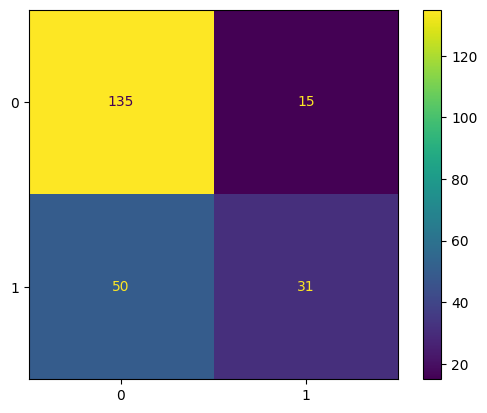

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
# Adam scores
adam_score = scores(116, 34, 26, 55)
print(adam_score)

accuracy: 0.7402597402597403
precision: 0.6790123456790124
recall: 0.6179775280898876


In [74]:
# RMSprop scores
rmsprop_score = scores(135, 15, 50, 31)
print(rmsprop_score)

accuracy: 0.7186147186147186
precision: 0.38271604938271603
recall: 0.6739130434782609


Overall, Adam performed better than RMSprop, with it performing much better than it with precision. The only thing it lost on was recall.

I think this might be because Adam not only performs root square propagation, but also performs momentum, which uses the averages of the gradients. RMSprop just performs root square propagation. Also, looking online, it seems that for RMSprop to perform optimally, it needs to be tuned well.

# Extra Credit

In [ ]:
def divisor(num: int = 20) -> str:
    '''
    This function takes an integer and returns the number of divisors
    and a list of these divisors. 
    '''
    divisor_list = []
    i = 1
    while i < num:
        if num % i == 0:
            divisor_list.append(i)
            i = i+1
        else:
            i = i+1
    
    x = 0
    
    print(f'There are {len(divisor_list)+1} divisors:', end = ' ')
    while x < len(divisor_list)-1:
        print(divisor_list[x], end = "")
        print(', ', end="")
        x = x+1
    print(divisor_list[x], end = ", ")
    print(f'and {num}')
    
    

In [124]:
divisor(40)

There are 8 divisors: 1, 2, 4, 5, 8, 10, 20, and 40
